# All Regression Notebook
## Load data
Declare and load the library, then load the dataset. Since the data do not contain the naming of columns, we had to add it in using a manual Python list

We will have `all_train_data` and `all_test_data`, which had been concatenated into their respective `DataFrame`.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:


columns_name = ["Popularity", "Check-in", "Activities", "Category"] \
            + ["F_{:d}".format(i) for i in range(1, 26)] \
            + ["CC{:d}".format(i) for i in range(1, 6)] \
            + ["Base time", "Post length", "Post count", "Post promotion", "Span time"] \
            + ["Post_date_{:d}".format(i) for i in range(1, 8)] \
            + ["Base_date_{:d}".format(i) for i in range(1, 8)] \
            + ["Span count"]
all_train_data = [pd.read_csv("/content/gdrive/MyDrive/Dataset/Training/Features_Variant_{:d}.csv".format(d), header=None) for d in range(1, 6)]
for data in all_train_data:
    print("Train sets size: {:d}".format(data.size))
# Put your code here to concatenate the training data
train_data=pd.concat(all_train_data,axis=0)
train_data.columns = columns_name

train_data

Train sets size: 2211246
Train sets size: 4390848
Train sets size: 6539292
Train sets size: 8662896
Train sets size: 10747620


,Popularity,Check-in,Activities,Category,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,CC1,CC2,CC3,CC4,CC5,Base time,Post length,Post count,Post promotion,Span time,Post_date_1,Post_date_2,Post_date_3,Post_date_4,Post_date_5,Post_date_6,Post_date_7,Base_date_1,Base_date_2,Base_date_3,Base_date_4,Base_date_5,Base_date_6,Base_date_7,Span count
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199025,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,229.165289,79.0,386.589075,0.0,1734.0,174.595041,60.0,298.763750,0.0,2082.0,446.801653,240.0,472.065684,-1348.0,1990.0,54.570248,-29.0,506.793596,1940,1940,0,1940,1940,16,77,2123,0,24,0,0,1,0,0,0,0,0,0,0,1,0,0,0,203
199026,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,229.165289,79.0,386.589075,0.0,1734.0,174.595041,60.0,298.763750,0.0,2082.0,446.801653,240.0,472.065684,-1348.0,1990.0,54.570248,-29.0,506.793596,155,155,0,155,155,4,130,474,0,24,0,0,1,0,0,0,0,0,0,0,1,0,0,0,42
199027,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,229.165289,79.0,386.589075,0.0,1734.0,174.595041,60.0,298.763750,0.0,2082.0,446.801653,240.0,472.065684,-1348.0,1990.0,54.570248,-29.0,506.793596,207,207,0,207,207,12,12,1511,0,24,0,0,0,1,0,0,0,0,0,0,1,0,0,0,51
199028,7170111,70,497000,9,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,229.165289,79.0,386.589075,0.0,1734.0,174.595041,60.0,298.763750,0.0,2082.0,446.801653,240.0,472.065684,-1348.0,1990.0,54.570248,-29.0,506.793596,629,85,544,619,-459,31,149,1099,0,24,0,0,0,1,0,0,0,0,0,0,0,1,0,0,17


In [ ]:
all_test_data = [pd.read_csv("/content/gdrive/MyDrive/Dataset/Testing/TestSet/Test_Case_{:d}.csv".format(d), header=None) for d in range(1, 10)]
# Put your code here to concatenate the test data
test_data=pd.concat(all_test_data,axis=0)
test_data.columns = columns_name

train_data["bias"] = 1
test_data["bias"] = 1

test_data

,Popularity,Check-in,Activities,Category,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,CC1,CC2,CC3,CC4,CC5,Base time,Post length,Post count,Post promotion,Span time,Post_date_1,Post_date_2,Post_date_3,Post_date_4,Post_date_5,Post_date_6,Post_date_7,Base_date_1,Base_date_2,Base_date_3,Base_date_4,Base_date_5,Base_date_6,Base_date_7,Span count,bias
0,1340759,33935,49392,9,0.0,768.0,77.200000,36.5,132.861432,0.0,275.0,28.600000,14.0,45.466911,0.0,716.0,47.825000,0.0,124.050572,0.0,744.0,76.000000,36.5,129.477604,-664.0,275.0,-19.225000,5.0,131.036538,0,0,0,0,0,0,150,23,0,22,0,0,0,0,1,0,0,0,0,0,0,1,0,0,35,1
1,161455,0,5978,4,3.0,75.0,22.714286,15.0,23.389340,3.0,75.0,16.857143,6.0,24.109444,0.0,15.0,4.142857,0.0,5.488392,3.0,75.0,21.142857,12.0,23.295791,-10.0,75.0,12.714286,5.0,26.266297,22,17,5,20,12,28,20,1,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,1
2,92385,88,34785,70,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0,0,0,0,32,182,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,395272,0,3406,17,0.0,22.0,4.000000,1.0,6.599663,0.0,22.0,3.111111,1.0,6.740334,0.0,2.0,0.222222,0.0,0.628539,0.0,22.0,3.888889,1.0,6.573422,-2.0,22.0,2.888889,1.0,6.870944,0,0,0,0,0,30,207,1,0,20,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
4,4349418,0,614043,9,0.0,958.0,65.974194,24.0,126.960748,0.0,787.0,61.096774,22.0,112.517169,0.0,371.0,4.877419,0.0,33.678238,0.0,912.0,65.587097,24.0,124.844202,-126.0,787.0,56.219355,21.0,107.096415,19,19,0,19,19,13,148,21,0,6,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3993438,0,140968,33,0.0,922.0,175.400000,75.0,207.098262,0.0,922.0,145.125000,67.0,203.969996,0.0,360.0,27.975000,0.0,72.570823,0.0,922.0,174.025000,75.0,206.512649,-264.0,922.0,117.150000,51.5,224.261293,76,76,0,76,76,8,119,1,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
96,1947049,2697,42688,9,0.0,95.0,25.882353,26.0,21.284853,0.0,54.0,15.470588,13.0,14.453242,0.0,82.0,9.058824,0.0,18.999909,0.0,92.0,25.352941,23.5,20.800003,-69.0,54.0,6.411765,5.5,26.605083,32,6,26,32,-20,30,117,31,0,24,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
97,6553444,0,165423,1,0.0,179.0,46.636364,23.0,62.992457,0.0,176.0,27.363636,6.0,49.088552,0.0,144.0,15.363636,0.0,41.110213,0.0,176.0,45.636364,23.0,61.391845,-139.0,176.0,12.000000,6.0,69.292529,23,2,21,23,-19,35,175,31,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
98,973240,0,74043,18,0.0,168.0,73.500000,63.0,60.466933,0.0,168.0,59.000000,34.0,66.464276,0.0,58.0,14.500000,0.0,25.114737,0.0,168.0,71.500000,59.0,60.714496,-47.0,168.0,44.500000,28.5,80.251168,69,11,58,61,-47,37,153,78,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,5,1


In [ ]:
test_data['Category'].value_counts().idxmax()
train_data['Category'].value_counts().idxmax()

9

## Selecting sub-category
The Category column contain arbitrary indices of the data category relating to the nature of the post itself. For the sake of simplification, we will just use the category with the largest amount of data to perform our Linear regression on.

Find and select the category with the most amount of records using pandas. Store it in the variable `largest_category`

In [ ]:
# Put your code here:
largest_category=test_data['Category'].value_counts().idxmax()

In [ ]:
# Categorize models
train_data = train_data.loc[train_data['Category'] == largest_category].drop('Category', axis=1)
test_data = test_data.loc[test_data['Category'] == largest_category].drop('Category', axis=1)

label = "Span count"
features = [col for col in train_data.columns if col != label]

train_features = train_data[ features ]
train_labels = train_data[ label ]
test_features = test_data[ features ]
test_labels = test_data[ label ]

In [ ]:
train_data

,Popularity,Check-in,Activities,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,CC1,CC2,CC3,CC4,CC5,Base time,Post length,Post count,Post promotion,Span time,Post_date_1,Post_date_2,Post_date_3,Post_date_4,Post_date_5,Post_date_6,Post_date_7,Base_date_1,Base_date_2,Base_date_3,Base_date_4,Base_date_5,Base_date_6,Base_date_7,Span count,bias
349,1552629,0,64641,0.0,910.0,159.701923,125.0,153.676163,0.0,621.0,62.206731,18.5,98.008293,0.0,742.0,59.211538,23.0,93.173398,0.0,864.0,150.081731,114.0,145.524839,-644.0,621.0,2.995192,-15.0,132.463220,353,353,0,353,353,9,57,1392,0,24,0,1,0,0,0,0,0,0,1,0,0,0,0,0,278,1
350,1552629,0,64641,0.0,910.0,159.701923,125.0,153.676163,0.0,621.0,62.206731,18.5,98.008293,0.0,742.0,59.211538,23.0,93.173398,0.0,864.0,150.081731,114.0,145.524839,-644.0,621.0,2.995192,-15.0,132.463220,88,88,0,88,88,17,45,167,0,24,0,0,1,0,0,0,0,0,0,0,1,0,0,0,21,1
351,1552629,0,64641,0.0,910.0,159.701923,125.0,153.676163,0.0,621.0,62.206731,18.5,98.008293,0.0,742.0,59.211538,23.0,93.173398,0.0,864.0,150.081731,114.0,145.524839,-644.0,621.0,2.995192,-15.0,132.463220,150,150,0,150,150,20,50,228,0,24,0,0,1,0,0,0,0,0,0,0,1,0,0,0,16,1
352,1552629,0,64641,0.0,910.0,159.701923,125.0,153.676163,0.0,621.0,62.206731,18.5,98.008293,0.0,742.0,59.211538,23.0,93.173398,0.0,864.0,150.081731,114.0,145.524839,-644.0,621.0,2.995192,-15.0,132.463220,264,3,50,241,-47,60,69,361,0,24,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,1
353,1552629,0,64641,0.0,910.0,159.701923,125.0,153.676163,0.0,621.0,62.206731,18.5,98.008293,0.0,742.0,59.211538,23.0,93.173398,0.0,864.0,150.081731,114.0,145.524839,-644.0,621.0,2.995192,-15.0,132.463220,117,10,107,116,-97,30,52,88,0,24,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199025,7170111,70,497000,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,229.165289,79.0,386.589075,0.0,1734.0,174.595041,60.0,298.763750,0.0,2082.0,446.801653,240.0,472.065684,-1348.0,1990.0,54.570248,-29.0,506.793596,1940,1940,0,1940,1940,16,77,2123,0,24,0,0,1,0,0,0,0,0,0,0,1,0,0,0,203,1
199026,7170111,70,497000,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,229.165289,79.0,386.589075,0.0,1734.0,174.595041,60.0,298.763750,0.0,2082.0,446.801653,240.0,472.065684,-1348.0,1990.0,54.570248,-29.0,506.793596,155,155,0,155,155,4,130,474,0,24,0,0,1,0,0,0,0,0,0,0,1,0,0,0,42,1
199027,7170111,70,497000,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,229.165289,79.0,386.589075,0.0,1734.0,174.595041,60.0,298.763750,0.0,2082.0,446.801653,240.0,472.065684,-1348.0,1990.0,54.570248,-29.0,506.793596,207,207,0,207,207,12,12,1511,0,24,0,0,0,1,0,0,0,0,0,0,1,0,0,0,51,1
199028,7170111,70,497000,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,229.165289,79.0,386.589075,0.0,1734.0,174.595041,60.0,298.763750,0.0,2082.0,446.801653,240.0,472.065684,-1348.0,1990.0,54.570248,-29.0,506.793596,629,85,544,619,-459,31,149,1099,0,24,0,0,0,1,0,0,0,0,0,0,0,1,0,0,17,1


## A basic correlation
As a little exercise, we will draw a correlation matrix between CC? variables. Correlation are useful to see if there are features that are too closely connected - and we don't want those together as they will introduce artificial noises that will overfit the model.

In [ ]:
#Put your code here:
CC_feature=[col for col in train_data.columns if str(col)[0:2]=='CC']

CC_feature

['CC1', 'CC2', 'CC3', 'CC4', 'CC5']

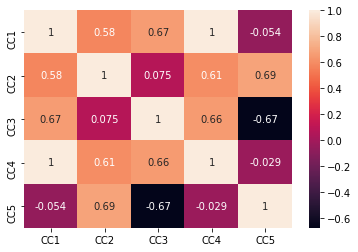

In [ ]:
import seaborn as sns
train_data_corr=train_data[CC_feature]
cor=train_data_corr.corr('pearson')
sns.heatmap(cor,annot=True)

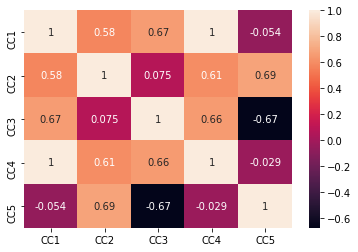

In [ ]:
test_data_corr=test_data[CC_feature]
cor=train_data_corr.corr('pearson')
sns.heatmap(cor,annot=True)

## Build Regression Models

__Our task is to predict the number of comments the post will receive ("Span count" column)__ <br>
"Span time" is necessary, while all other columns are optional <br>
Try a simple Multiple Regression model with only the basic features: <br>
["Popularity", "Base time", "Post length", "Post count", "Span time", "bias"] <br>

Print out either the MSE score from sklearn or the RSS score learned from the course for both training and testing dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#Put your code here:
fearture=["Popularity", "Base time", "Post length", "Post count", "Span time", "bias"]

features_train=train_data[fearture]
target_train=train_data['Span count']

features_test=test_data[fearture]
target_test=test_data['Span count']



In [ ]:
features_train.shape

(110313, 6)

In [ ]:
model=LinearRegression()
model.fit(features_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
target_hat=model.predict(features_test)
mse=mean_squared_error(target_test,target_hat)

In [ ]:
mse

5340.589651600935

### Try improving with more features
Not the greatest model we could use. We should try to add even more relevant features. <br>Append all the CC properties to the features and try again, with the same metrics.

In [ ]:
#Put your code here:
fearture.extend(CC_feature)
features_train=train_data[fearture]
target_train=train_data['Span count']

features_test=test_data[fearture]
target_test=test_data['Span count']


In [ ]:
model2=LinearRegression()
model2.fit(features_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
target_hat=model2.predict(features_test)
mse=mean_squared_error(target_test,target_hat)
mse

3878.532095624107

In [ ]:
model2.coef_

array([ 9.91979791e-07, -4.30641402e-01,  3.06804017e-04,  1.12738952e-02,
        2.34792029e-01,  4.16333634e-17,  3.38012276e-02,  8.22011917e-02,
        2.71663077e-02, -4.24224498e-02,  5.50348840e-02])

Moral of the day: Premature optimization are rarely ever worth it.

## Resolve overfit
### Applying resolution for overfit

The discrepancy between the score of the training and testing indicate that we may be overfitting the model. Let's try to fix it. Span the [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) (cv = 10) regression with alpha along logspace between 0 and 10, record the value with the best performance as variable `best_alpha`, and *optionally draw a graph for the coefficients magnitude*.

In [ ]:
#Put your code here:
from sklearn.linear_model import RidgeCV,Ridge,Lasso
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [ ]:
train_data.columns[1]

'Check-in'

### Try RidgeCV Regression on every columns
It worked, but one have to wonder if we are still using the incomplete set of features instead of the optimal one. Expand the features to all columns except our designated label. Run and see what happens.

In [ ]:
#Put your code here:

train_features=train_data.drop(['Span count'],axis=1)
train_labels=train_data['Span count'].values
train_labels=train_labels.reshape(-1,1)


std=MinMaxScaler()
train_features=std.fit_transform(train_features)



test_features=test_data.drop(['Span count'],axis=1)
test_labels=test_data['Span count']

test_features=std.transform(test_features)

train_labels=std.fit_transform(train_labels)

multi_model=RidgeCV(alphas=(0.1, 1.0, 10.0),cv=10)

multi_model.fit(train_features,train_labels)
test_predictions=multi_model.predict(test_features)
test_predictions=std.inverse_transform(test_predictions)


test_mse_score = mean_squared_error(test_predictions, test_labels)
train_mse_score = mean_squared_error(std.inverse_transform(train_labels), std.inverse_transform(multi_model.predict(train_features)))
print("MSE on training: {:.4f}; MSE on test: {:.4f}".format(train_mse_score, test_mse_score))

MSE on training: 1512.3789; MSE on test: 3938.9646


In [ ]:
test_predictions.shape

(261, 1)

In [ ]:
alphas = np.logspace(-0.5, 3, 200)
train_labels=np.squeeze(train_labels,axis=1)


In [ ]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(train_features, train_labels)
    coefs.append(ridge.coef_)

In [ ]:
np.shape(coefs)


(200, 53)

Text(0, 0.5, 'weights')

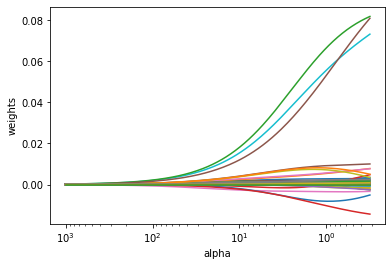

In [ ]:
import matplotlib.pylab as plt
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Features selection
### Apply LASSO
Now, we can try trimming the features using something we had learned throughout the course. This time record the selected features of [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) (cv = 10) using variable `lasso_selected_features`, and <i>optionally draw a graph between number of removed features and alpha values</i>.

In [ ]:
#Put your code here:
from sklearn.linear_model import LassoCV
model3=LassoCV(cv=10)


In [ ]:
def number_of_removed_features(model3):
  coef=model3.coef_
  lasso_selected_features=[]
  for i in range(len(coef)):
    if coef[i]!=0:
      lasso_selected_features.append(train_data.columns[i])
      
  return len(train_data.columns)-len(lasso_selected_features)

In [ ]:
train_features.shape

(110313, 53)

In [ ]:
alphas = np.logspace(-7, -3, 100)
lasso = Lasso(normalize = True)
number_feature = []
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(train_features, train_labels)
    number=number_of_removed_features(lasso)
    number_feature.append(number)

Text(0, 0.5, ' number_feature')

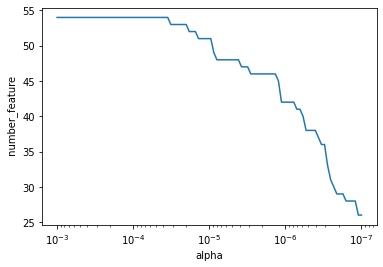

In [ ]:
ax = plt.gca()
ax.plot(alphas, number_feature)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel(' number_feature')

### Build a model strictly with the selected features
Remember that when you do features selecting, you may have to re-add bias into the list of features yet again. Use the selected features to build a model and calculate the performance basing on the metrics.

In [ ]:
model3=LassoCV(cv=10)
model3.fit(train_features, train_labels)
coef=model3.coef_
lasso_selected_features=[]
for i in range(len(coef)):
  if coef[i]!=0:
      lasso_selected_features.append(train_data.columns[i])
if("bias" not in lasso_selected_features):
    lasso_selected_features.append('bias')


In [ ]:
train_features=train_data.drop(['Span count'],axis=1)
train_labels=train_data['Span count'].values
train_labels=train_labels.reshape(-1,1)


std=MinMaxScaler()
train_features=std.fit_transform(train_features)

test_features=test_data.drop(['Span count'],axis=1)
test_labels=test_data['Span count']

test_features=std.transform(test_features)
train_labels=std.fit_transform(train_labels)

multi_model=LassoCV(cv=10)
multi_model.fit(train_features,train_labels)
test_predictions=multi_model.predict(test_features)
test_predictions=std.inverse_transform(test_predictions.reshape(-1,1))

test_mse_score = mean_squared_error(test_predictions, test_labels)
train_mse_score = mean_squared_error(std.inverse_transform(train_labels), std.inverse_transform(multi_model.predict(train_features).reshape(-1,1)))
print("MSE on training: {:.4f}; MSE on test: {:.4f}".format(train_mse_score, test_mse_score))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE on training: 1514.3263; MSE on test: 4172.4610


In [ ]:
test_predictions.shape

(261, 1)

In [ ]:
test_predictions

In [ ]:
coef

array([ 0.00742071, -0.00165534, -0.00809641, -0.        ,  0.        ,
        0.        ,  0.        ,  0.01051577, -0.        , -0.00103375,
        0.01490119,  0.01157498, -0.        ,  0.        ,  0.        ,
        0.        ,  0.00496033,  0.00125682, -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.00069415,  0.        ,
        0.        , -0.        , -0.01013045, -0.01524804,  0.1130981 ,
       -0.        , -0.        ,  0.06275398, -0.01704586, -0.        ,
        0.11190972,  0.        ,  0.002139  , -0.00049996, -0.00089776,
       -0.00013395,  0.00024049,  0.0001991 ,  0.00032825,  0.        ,
       -0.        ,  0.00023257,  0.00060695,  0.0013253 , -0.00046276,
       -0.0004582 , -0.00014527,  0.        ])

## Combine everything on one model
So LASSO performed admirably, shrinking aways unnecessary and noisy features and quicken the speed of calculation. Now let us combine both previous techniques together on one model.

In [ ]:
#Put your code here:
train_feature=train_data[lasso_selected_features]
test_feature=test_data[lasso_selected_features]

train_labels=train_data['Span count'].values
test_labels=test_data['Span count'].values.reshape(-1,1)


train_feature=std.fit_transform(train_feature)
test_feature=std.transform(test_feature)

train_labels=train_labels.reshape(-1,1)
train_labels=std.fit_transform(train_labels)

multi_model=RidgeCV(alphas=(0.1, 1.0, 10.0),cv=10)
multi_model.fit(train_feature,train_labels)

test_predictions=multi_model.predict(test_feature)
test_predictions=std.inverse_transform(test_predictions)

test_mse_score = mean_squared_error(test_predictions, test_labels)
train_mse_score = mean_squared_error(std.inverse_transform(train_labels), std.inverse_transform(multi_model.predict(train_feature)))
print("MSE on training: {:.4f}; MSE on test: {:.4f}".format(train_mse_score, test_mse_score))



MSE on training: 1514.0617; MSE on test: 4138.5645


In [ ]:
multi_model.alpha_

1.0

### Distribution of square errors
The conclusion is yours to draw. As a side note, let's see how the square errors are distributed.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


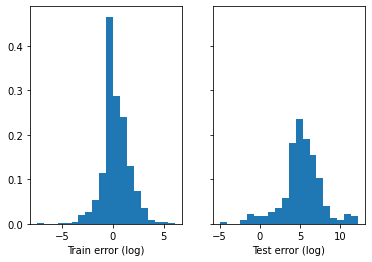

In [ ]:
train_square_errors = np.log((std.inverse_transform(train_labels) - std.inverse_transform(multi_model.predict(train_feature))**2))
test_square_errors = np.log((test_labels - test_predictions)**2)
fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharey=True)
train_ax.hist(train_square_errors, bins=20, density=True)
train_ax.set_xlabel("Train error (log)")
test_ax.set_xlabel("Test error (log)")
test_ax.hist(test_square_errors, bins=20, density=True)
plt.show()